# Construire et entraîner un perceptron multi-couches - étape par étape

Dans ce TP, vous allez mettre en œuvre l'entraînement d'un réseau de neurones (perceptron multi-couches) à l'aide de la librairie **numpy**. Pour cela nous allons procéder par étapes successives. Dans un premier temps nous allons traiter le cas d'un perceptron mono-couche, en commençant par la passe *forward* de prédiction d'une sortie à partir d'une entrée et des paramètres du perceptron, puis en implémentant la passe *backward* de calcul des gradients de la fonction objectif par rapport aux paramètrès. A partir de là, nous pourrons tester l'entraînement à l'aide de la descente de gradient stochastique.

Une fois ces étapes achevées, nous pourrons nous atteler à la construction d'un perceptron multi-couches, qui consistera pour l'essentiel en la composition de perceptrons mono-couche. 

Dans ce qui suit, nous adoptons les conventions de notation suivantes : 

- $(x, y)$ désignent un couple donnée/label de la base d'apprentissage ; $\hat{y}$ désigne quant à lui la prédiction du modèle sur la donnée $x$.

- L'indice $i$ indique la $i^{\text{ème}}$ dimension d'un vecteur.

- L'exposant $[l]$ désigne un objet associé à la $l^{\text{ème}}$ couche.

- L'exposant $(k)$ désigne un objet associé au $k^{\text{ème}}$ exemple. 
   
Exemple:  
- $a^{(2)[3]}_5$ indique la 5ème dimension du vecteur d'activation du 2ème exemple d'entraînement (2), de la 3ème couche [3].


Commençons par importer tous les modules nécessaires : 

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn import datasets


--- 

## Perceptron mono-couche


### Perceptron mono-couche - passe *forward*

Un perceptron mono-couche est un modèle liant une couche d'entrée (en vert, qui n'effectue pas d'opération) à une couche de sortie. Les neurones des deux couches sont connectés par des liaisons pondérées (les poids synaptiques) $W_{xy}$, et les neurones de la couche de sortie portent chacun un biais additif $b_y$. Enfin, une fonction d'activation $f$ est appliquée à l'issue de ces opérations pour obtenir la prédiction du réseau $\hat{y}$. 

On a donc :

$$\hat{y} = f ( W_{xy} x + b_y )$$ 

On posera pour la suite :
$$ z = W_{xy} x + b_y $$

La figure montre une représentation de ces opérations sous forme de réseau de neurones (à gauche), mais aussi sous une forme fonctionnelle (à droite) qui permet de bien visualiser l'ordre des opérations.

<!-- <img src="https://drive.google.com/uc?id=1RZeiaKue0GLXJr3HRtKkuP6GD8r6I1_Q" height=300> -->
<!-- <img src="https://drive.google.com/uc?id=1dnQ6SSdpEX1GDTgoNTrUwA3xjiP9rTYU" height=250> -->
<img src="https://docs.google.com/uc?export=download&id=1U4V-MwOatw4axK2u8sJxaasUMl6A3TPo" height=300>
<img src="https://docs.google.com/uc?export=download&id=14tq-pbbFLvBZU-8LGvgYA71vrWNmSK73" height=250> 

Notez que les paramètres du perceptron, que nous allons ajuster par un processus d'optimisation, sont donc les poids synaptiques $W_{xy}$ et les biais $b_y$. Par commodité dans le code, nous considérerons également comme un paramètre le choix de la fonction d'activation.

**Remarque importante** : on a ici simplifié les dimensions des tenseurs en considérant que les données étaient prédites une à une par le perceptron. En pratique, on traite souvent les données par *batch*, c'est-à-dire que les prédictions sont faites pour plusieurs données simultanément. Ici pour une taille de *batch* de $m$, cela signifie en fait que :
 
$$ x \in \mathbb{R}^{4 \times m} \text{  et  } y \in \mathbb{R}^{5 \times m}$$ 


Complétez la fonction `dense_layer_forward` qui calcule la prédiction  d'un perceptron mono-couche pour une entrée $x$. 

In [7]:
def dense_layer_forward(x, Wxy, by, activation):
    """
    Réalise une unique étape forward de la couche dense telle que décrite dans la figure (2)

    Arguments:
    x -- l'entrée, tableau numpy de dimension (n_x, m).
    Wxy -- Matrice de poids multipliant l'entrée, tableau numpy de shape (n_y, n_x)
    by -- Biais additif ajouté à la sortie, tableau numpy de dimension (n_y, 1)
    activation -- Chaîne de caractère désignant la fonction d'activation choisie : 'linear', 'sigmoid' ou 'relu'

    Retourne :
    y_pred -- prédiction, tableau numpy de dimension (n_y, m)
    cache -- tuple des valeurs utiles pour la passe backward (rétropropagation du gradient), contient (x, z)
    """
    
    ### A COMPLETER ### 
    # calcul de z
    z = ...
    # calcul de la sortie en appliquant la fonction d'activation
    if activation == 'relu':
      y = ...
    elif activation == 'sigmoid':
      y = ...
    elif activation == 'linear':
      y = ...
    else:
      print("Erreur : la fonction d'activation n'est pas implémentée.")
    
    # sauvegarde du cache pour la passe backward
    cache = (x, z)
    
    return y, cache

Exécutez les lignes suivantes pour vérifier la validité de votre code :

In [8]:
np.random.seed(1)

x_tmp = np.random.randn(3,10)
Wxy = np.random.randn(2,3)
by = np.random.randn(2,1)

activation = 'relu'
y_pred_tmp, cache_tmp = dense_layer_forward(x_tmp, Wxy, by, activation)

print("y_pred.shape = \n", y_pred_tmp.shape)

print('----------------------------')

print("y_pred[1] =\n", y_pred_tmp[1])

print('----------------------------')

activation = 'sigmoid'
y_pred_tmp, cache_tmp = dense_layer_forward(x_tmp, Wxy, by, activation)
print("y_pred[1] =\n", y_pred_tmp[1])

print('----------------------------')

activation = 'linear'
y_pred_tmp, cache_tmp = dense_layer_forward(x_tmp, Wxy, by, activation)
print("y_pred[1] =\n", y_pred_tmp[1])

y_pred.shape = 
 (2, 10)
----------------------------
y_pred[1] =
 [0.         2.11983968 0.88583246 1.39272594 0.         2.92664609
 0.         1.47890228 0.         0.04725575]
----------------------------
y_pred[1] =
 [0.10851642 0.89281659 0.70802939 0.80102707 0.21934644 0.94914804
 0.24545321 0.81440672 0.48495927 0.51181174]
----------------------------
y_pred[1] =
 [-2.10598556  2.11983968  0.88583246  1.39272594 -1.26947904  2.92664609
 -1.12301093  1.47890228 -0.06018107  0.04725575]


**Affichage attendu**: 
```Python
y_pred.shape = 
 (2, 10)
----------------------------
y_pred[1] =
 [0.         2.11983968 0.88583246 1.39272594 0.         2.92664609
 0.         1.47890228 0.         0.04725575]
----------------------------
y_pred[1] =
 [0.10851642 0.89281659 0.70802939 0.80102707 0.21934644 0.94914804
 0.24545321 0.81440672 0.48495927 0.51181174]
----------------------------
y_pred[1] =
 [-2.10598556  2.11983968  0.88583246  1.39272594 -1.26947904  2.92664609
 -1.12301093  1.47890228 -0.06018107  0.04725575]

```

### Perceptron mono-couche - passe *backward*

Dans les librairies d'apprentissage profond actuelles, il suffit d'implémenter la passe *forward*, et la passe *backward* est réalisée automatiquement, avec le calcul des gradients (différentiation automatique) et la mise à jour des paramètres. Il est cependant intéressant de comprendre comment fonctionne la passe *backward*, en l'implémentant sur un exemple simple.

<!-- <img src="https://drive.google.com/uc?id=1MC8Nxu6BQnpB7cGLwunIbgx9s1FaGw81" height=350> -->
<img src="https://docs.google.com/uc?export=download&id=1bIk-7GppJzkP2HNJ9RMvhjPoBNuNX-yU" height=350> 

Il faut calculer les dérivées par rapport à la fonction de perte pour ensuite mettre à jour les paramètres du réseau. Les équations de rétropropagation sont données ci-dessous (c'est un bon exercice que de les calculer à la main). 

\begin{align}
\displaystyle  {dW_{xy}} &~=~ \frac{\partial J}{\partial W_{xy}} ~=~ dz . x^{T}\tag{1} \\[8pt]
\displaystyle db_{y} &~=~ \frac{\partial J}{\partial b_y} ~=~ \sum_{batch}dz\tag{2} \\[8pt]
\displaystyle dx &~=~ \frac{\partial J}{\partial x} ~=~ { W_{xy}}^T . dz \tag{3}  \\[8pt]
\end{align}


Ici, $*$ indique une multiplication élément par élément tandis que l'absence de symbole indique une multiplication matricielle. Par ailleurs $dz$ désigne $\frac{\partial J}{\partial z}=\frac{\partial J}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial z}$, $dW_{xy}$ désigne $\frac{\partial J}{\partial W_{xy}}$, $db_y$ désigne $\frac{\partial J}{\partial b_y}$ et $dx$ désigne $\frac{\partial J}{\partial x}$ (ces noms ont été choisis pour être utilisables dans le code).

In [9]:
def dense_layer_backward(dy_hat, Wxy, by, activation, cache):
    """
    Implémente la passe backward de la couche dense.

    Arguments :
    dy_hat -- Gradient de la perte J par rapport à la sortie ŷ
    cache -- dictionnaire python contenant des variables utiles (issu de dense_layer_forward())

    Retourne :
    gradients -- dictionnaire python contenant les gradients suivants :
                        dx -- Gradients par rapport aux entrées, de dimension (n_x, m)
                        dby -- Gradients par rapport aux biais, de dimension (n_y, 1)
                        dWxy -- Gradients par rapport aux poids synaptiques Wxy, de dimension (n_y, n_x)
    """
    
    # Récupérer le cache
    (x, z) = cache

    ### A COMPLETER ###   
    # calcul de la sortie en appliquant l'activation
    # dy_dz -- Gradient de la sortie ŷ par rapport à l'état caché z
    if activation == 'relu':
      dy_dz = ...
    elif activation == 'sigmoid':
      dy_dz = ...
    else: # Activation linéaire
      dy_dz = ... 


    # calculer le gradient de la perte par rapport à x
    dx = ... 

    # calculer le gradient de la perte par rapport à Wxy
    dWxy = ... 

    # calculer le gradient de la perte par rapport à by 
    dby = ... 

    ### FIN ###
    
    # Stocker les gradients dans un dictionnaire
    gradients = {"dx": dx, "dby": dby, "dWxy": dWxy}
    
    return gradients

On peut maintenant créer une classe `DenseLayer`, qui comprend en attribut toutes les informations nécessaires à la description d'une couche dense, c'est-à-dire : 

*   Le nombre de neurones en entrée de la couche dense (input_size)
*   Le nombre de neurones en sortie de la couche dense (output_size)
*   La fonction d'activation choisie sur cette couche (activation)
*   Les poids synaptiques de la couche dense, stockés dans une matrice de taille (output_size, input_size) (Wxy)
*   Les biais de la couche dense, stockés dans un vecteur de taille (output_size, 1) (by)

On ajoute également un attribut cache qui permettra de stocker les entrées de la couche dense (x) ainsi que les calculs intermédiaires (z) réalisés lors de la passe *forward*, afin d'être réutilisés pour la basse *backward*.

A vous de compléter les 4 jalons suivants : 

*   **L'initialisation des paramètres** Wxy et by : Wxy doit être positionnée suivant [l'initialisation de Glorot](https://www.tensorflow.org/api_docs/python/tf/keras/initializers/GlorotUniform), et by est initialisée par un vecteur de zéros.
*   **La fonction `forward`**, qui consiste simplement en un appel de la fonction `dense_layer_forward` implémentée précédemment.
*   **La fonction `backward`**, qui consiste simplement en un appel de la fonction `dense_layer_backward` implémentée précédemment.
*   Et enfin **la fonction `update_parameters`** qui applique la mise à jour de la descente de gradient en fonction d'un taux d'apprentissage (learning_rate) et des gradients calculés dans la passe *forward*.

In [10]:
class DenseLayer:
    def __init__(self, input_size, output_size, activation):
      self.input_size = input_size
      self.output_size = output_size
      self.activation = activation
      self.cache = None  # Le cache sera mis à jour lors de la passe forward
      limit = math.sqrt(6 / (input_size + output_size))
    
      ### A COMPLETER ###
      self.Wxy = ... # https://www.tensorflow.org/api_docs/python/tf/keras/initializers/GlorotUniform
      self.by = ...

    def forward(self, x_batch):
      y, cache = ...
      self.cache = cache
      return y

    def backward(self, dy):
      return ...

    def update_parameters(self, gradients, learning_rate):
      self.Wxy -= learning_rate * gradients["dWxy"]
      self.by  -= learning_rate * gradients["dby"]


### Entraînement par descente de gradient stochastique

Pour entraîner notre modèle, nous devons mettre en place un optimiseur. Nous implémenterons la descente de gradient stochastique avec mini-batch. Il nous faut cependant au préalable implanter la fonction de coût que nous utiliserons pour évaluer la qualité de nos prédictions. 

Pour le moment, nous allons nous contenter d'une erreur quadratique moyenne, qui associée à une fonction d'activation linéaire (l'identité) permet de résoudre les problèmes de régression. 

La fonction de coût prend en entrée deux paramètres : la vérité-terrain *y_true* et la prédiction du modèle *y_pred*. Ces deux matrices sont de dimension $bs \times output\text{_}size$. La fonction retourne deux grandeurs : *loss* qui correspond à l'erreur quadratique moyenne des prédictions par rapport aux vérités-terrains, et *grad* au gradient de l'erreur quadratique moyenne par rapport aux prédictions. Autrement dit : 
$$ \text{grad}  = \frac{\partial J_{mb}}{\partial \hat{y}}$$

où $\hat{y}$ correspond à *y_pred*, et $J_{mb}$ à la fonction objectif calculée sur un mini-batch $mb$ de données.

In [11]:
### A COMPLETER ###
def mean_square_error(y_true, y_pred):
  loss = ...
  grad = ...

  return loss, grad

La descente de gradient stochastique prend en entrée les paramètres suivants :  
*    *x_train* et *y_train* respectivement les données et labels de l'ensemble d'apprentissage (que l'on suppose de taille $N$).
*    *model* une instance du modèle que l'on veut entraîner (qui doit implanter les 3 fonctions vues précédemment *forward*, *backward* et *update_parameters*).
*    *loss_function* peut prendre deux valeurs : 'mse' (erreur quadratique moyenne) ou 'bce' (entropie croisée binaire, que nous implémenterons par la suite).
*    *learning_rate* le taux d'apprentissage choisi pour la descente de gradient.
*    *epochs* le nombre de parcours complets de l'ensemble d'apprentissage que l'on veut réaliser.
*    *batch_size* la taille de mini-batch désirée pour la descente de gradient stochastique. 

L'algorithme à implémenter est rappelé ci-dessous :       
```
N_batch = floor(N/batch_size)

Répéter epochs fois

  Pour b de 1 à N_batch Faire

    Sélectionner les données x_train_batch et labels y_train_batch du b-ème mini-batch
    Calculer la prédiction y_pred_batch du modèle pour ce mini-batch
    Calculer la perte batch_loss et le gradient de la perte batch_grad par rapport aux prédictions sur ce mini-batch
    Calculer les gradients de la perte par rapport à chaque paramètre du modèle
    Mettre à jour les paramètres du modèle 

  Fin Pour

Fin Répéter

```
Deux remarques additionnelles :    
1. A chaque *epoch*, les *mini-batches* doivent être différents (les données doivent être réparties dans différents *mini-batches*).
2. Il est intéressant de calculer (et d'afficher !) la perte moyennée sur l'ensemble d'apprentissage à chaque *epoch*. Pour cela, on peut accumuler les pertes de chaque *mini-batch* sur une *epoch* et diviser l'ensemble par le nombre de *mini-batches*.

In [12]:
def SGD(x_train, y_train, model, loss_function, learning_rate, epochs, batch_size):
  # Nombre de batches par epoch
  nb_batches = math.floor(x_train.shape[0] / batch_size)

  # Pour gérer le tirage aléatoire des batches parmi les données d'entraînement, 
  # génération et permutation des indices
  indices = np.arange(x_train.shape[0])
  indices = np.random.permutation(indices)

  for e in range(epochs):

    running_loss = 0

    for b in range(nb_batches):

      # Sélection des données du batch courant
      x_train_batch = x_train[indices[b*batch_size:(b+1)*batch_size]]
      y_train_batch = y_train[indices[b*batch_size:(b+1)*batch_size]]

      # Prédiction du modèle pour le batch courant
      y_pred_batch = model.forward(np.transpose(x_train_batch))

      # Calcul de la perte et des gradients sur le batch courant
      if loss_function == 'mse':
        batch_loss, batch_gradients = mean_square_error(y_train_batch, y_pred_batch)
      elif loss_function == 'bce':
        batch_loss, batch_gradients = binary_cross_entropy(y_train_batch, y_pred_batch)

      running_loss += batch_loss 

      # Calcul du gradient de la perte par rapport aux paramètres du modèle
      param_updates = model.backward(batch_gradients)

      # Mise à jour des paramètres du modèle
      model.update_parameters(param_updates, learning_rate)

    print("Epoch %4d : Loss : %.4f" % (e, float(running_loss/nb_batches)))

    # Nouvelle permutation des données pour la prochaine epoch
    indices = np.random.permutation(indices)
    
  return model

### Test sur un problème de régression 

Le bloc de code suivant permet de générer et d'afficher des ensembles de données d'apprentissage et de test pour un problème de régression linéaire classique. 

In [23]:
x, y = datasets.make_regression(n_samples=250, n_features=1, n_targets=1, random_state=1, noise=10)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/10, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/9, random_state=1)

### A COMPLETER ###
# Afficher un nuage de points permettant de distinguer "Ensemble d'apprentissage" et "Ensemble de test"
# (par exemple, en traçant l'un en bleu et l'autre en rouge)

[...]

[Ellipsis]

In [24]:
### A COMPLETER ###
model = DenseLayer(...)
model = SGD(...)
# On pourra choisir des batchs de taille 20, pour 10 epochs et un learning-rate de 0.1

# Ajouter la droite de régression linéaire obtenue sur la figure ci-dessus.

[...]

TypeError: __init__() missing 2 required positional arguments: 'output_size' and 'activation'

### Test sur un problème de classification binaire

Afin de pouvoir tester notre perceptron mono-couche sur un problème de classification binaire (i.e. effectuer une régression logistique), il est d'abord nécessaire d'implémenter l'entropie croisée binaire.

In [15]:
def binary_cross_entropy(y_true, y_pred):
  loss = np.mean(- y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred))
  grad =  (- y_true / y_pred + (1 - y_true) / (1 - y_pred))/y_true.shape[0]

  return loss, grad

In [25]:
x, y = datasets.make_blobs(n_samples=250, n_features=2, centers=2, center_box=(- 3, 3), random_state=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/10, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/9, random_state=1)

### A COMPLETER ###
# Proposer une figure permetant de distinguer "Enssemble d'apprentissage" et "Ensemble de test", 
# ainsi que les différentes classes.

[...]

[Ellipsis]

In [26]:
### A COMPLETER ###
model = DenseLayer(...)
model = SGD(...)
# On pourra choisir des batchs de taille 20, pour 50 epochs et un learning-rate de 0.3

# Ajouter la droite permetant de séparer les deux classes, i.e. la droite de régression logistique,
# obtenue sur la figure ci-dessus.

[...]

TypeError: __init__() missing 2 required positional arguments: 'output_size' and 'activation'

---

## Perceptron multi-couche

Nous allons à présent construire un perceptron multi-couches en se basant sur le perceptron mono-couche précédement développé. L'idée est d'accoler des perceptrons mono-couche en utilisant la sortie de la couche précédente comme entrée de la couche courante.

En remarquant cela on peut créer une classe `MultiLayerPerceptron`. En particulier, la fonction `add_layer` permet d'ajouter au MLP le *layer* qu'elle prend en entrée. 

In [19]:
class MultiLayerPerceptron:
    def __init__(self):
      self.layers = []

    def add_layer(self, layer):
      self.layers.append(layer)

    def forward(self, x_batch):

      output_l = x_batch

      for i in range(len(self.layers)):
        # La sortie de la couche précédente est passée en entrée de la couche courante
        input_l = output_l
        
        output_l = self.layers[i].forward(input_l)  
      
      # La sortie de la dernière couche est la sortie finale du réseau
      y = output_l

      return y

    def backward(self, dy):
      gradients = []
      
      for i in reversed(range(len(self.layers))):
        # La sortie de la couche précédente est passée en entrée de la couche courante
        layer_gradients = self.layers[i].backward(dy)  
        gradients.append(layer_gradients) 
        dy = layer_gradients["dx"]
      
      gradients.reverse()
      return gradients

    def update_parameters(self, gradients, learning_rate):
      for i in range(len(self.layers)):
        self.layers[i].update_parameters(gradients[i], learning_rate)

In [27]:
x, y = datasets.make_gaussian_quantiles(n_samples=250, n_features=2, n_classes=2, random_state=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/10, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/9, random_state=1)

### A COMPLETER ###
# Proposer une figure permetant de distinguer "Enssemble d'apprentissage" et "Ensemble de test", 
# ainsi que les différentes classes.

[...]

[Ellipsis]

En utilisant la fonction `add_layer` et la classe `DenseLayer`, nous pouvons à présent juxtaposer des perceptrons mono-couche, de sorte à construire un perceptron multi-couche.

<img src="https://docs.google.com/uc?export=download&id=1F6greDVfj0-KcQKyP6rWMnO1rDH_Ck23" height=200> 

Construisez le réseau ci-dessus, en choisissant une fonction d'activation ReLu pour chacune des couches cachées et sigmoïde pour la couche de sortie.

In [21]:
model = MultiLayerPerceptron()
model.add_layer(DenseLayer(...))
[...]

model = SGD(x_train, y_train, model, 'bce', 0.1, 75, 20)

Epoch    0 : Loss : 0.6976
Epoch    1 : Loss : 0.6942
Epoch    2 : Loss : 0.6922
Epoch    3 : Loss : 0.6929
Epoch    4 : Loss : 0.6883
Epoch    5 : Loss : 0.6871
Epoch    6 : Loss : 0.6832
Epoch    7 : Loss : 0.6798
Epoch    8 : Loss : 0.6765
Epoch    9 : Loss : 0.6681
Epoch   10 : Loss : 0.6598
Epoch   11 : Loss : 0.6481
Epoch   12 : Loss : 0.6335
Epoch   13 : Loss : 0.6119
Epoch   14 : Loss : 0.5844
Epoch   15 : Loss : 0.5528
Epoch   16 : Loss : 0.5043
Epoch   17 : Loss : 0.4426
Epoch   18 : Loss : 0.3818
Epoch   19 : Loss : 0.3363
Epoch   20 : Loss : 0.2783
Epoch   21 : Loss : 0.2371
Epoch   22 : Loss : 0.2175
Epoch   23 : Loss : 0.1929
Epoch   24 : Loss : 0.1731
Epoch   25 : Loss : 0.1552
Epoch   26 : Loss : 0.1381
Epoch   27 : Loss : 0.1378
Epoch   28 : Loss : 0.1309
Epoch   29 : Loss : 0.1215
Epoch   30 : Loss : 0.1166
Epoch   31 : Loss : 0.1015
Epoch   32 : Loss : 0.1130
Epoch   33 : Loss : 0.0991
Epoch   34 : Loss : 0.1249
Epoch   35 : Loss : 0.1404
Epoch   36 : Loss : 0.1524
E

(51, 61) (51, 61) (51, 61)


/var/folders/pv/w96wvnnj27j18vplbhmz_yvwvgj4vl/T/ipykernel_18806/2931231555.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = plt.pcolor(x, y, z_gen, cmap='RdBu', vmin=z_min, vmax=z_max)


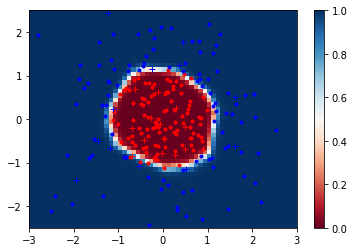

In [22]:
# make these smaller to increase the resolution
dx, dy = 0.1, 0.1

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(-2.5, 2.5 + dy, dy),
                slice(-3, 3 + dx, dx)]


x_gen = np.concatenate((np.expand_dims(np.reshape(y, (-1)),1),np.expand_dims(np.reshape(x, (-1)),1)), axis=1)
z_gen = model.forward(np.transpose(x_gen)).reshape(x.shape)

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
#z = z[:-1, :-1]
z_min, z_max = 0, 1

print(x.shape, y.shape, z_gen.shape)

c = plt.pcolor(x, y, z_gen, cmap='RdBu', vmin=z_min, vmax=z_max)
plt.colorbar(c)

plt.plot(x_train[y_train==0,0], x_train[y_train==0,1], 'r.')
plt.plot(x_train[y_train==1,0], x_train[y_train==1,1], 'b.')

plt.plot(x_test[y_test==0,0], x_test[y_test==0,1], 'r+')
plt.plot(x_test[y_test==1,0], x_test[y_test==1,1], 'b+')



plt.show()


Dans le code ci-dessus, que représente *z_gen* ? Commentez le résultat obtenus.